## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

1.  
Varibles chosen (each in the **data** folder under lab):
* divorced (ever been divorced or separated)
* marital (marital status)
* widowed (ever been widowed)
* spdeg (spouse's highest degree)
* hompop (number of persons in household)

In [175]:
#2.
# ! pip3 install docx2txt 
# uncomment & run above line if you need docx2txt for the next cell!

import docx2txt # see above
import textwrap
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

text = docx2txt.process("number_2.docx")
wrapped_text = "\n\n".join(textwrap.fill(para, width=160) for para in text.split("\n") if para.strip())

print("#2.")
print("FROM WORD DOCUMENT IN DIRECTORY:\n")

print(wrapped_text)

#2.
FROM WORD DOCUMENT IN DIRECTORY:

Above, you might notice that I chose variables that had to do with one’s marital status. For an overview, I decided to do all of them, or to follow this
specific theme, because I wanted to analyze how the marriages generally changed over time. We’ll learn about how many people spouses lived with, if there’s a
difference in amount of people whose spouses die early, and if partners are used to both getting degrees, or if it was almost limited to just one degree per
household. I also chose all 5 based on them having consistent/full distributions across most years since the beginning surveys.

I chose “divorced” as one variable because I wanted to see if divorced citizens were more common or not. This could lead into a discussion on why the results
are the way they are. From modern life, we can tell that most people get divorced due to social pressures, external circumstances, are a realization that the
partner isn’t the best fit. It’d be an interestin

DIVORCE:
['Inapplicable' 'NO' 'YES' 'Other']


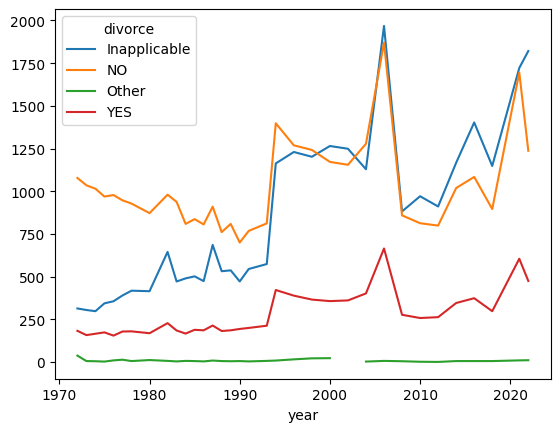

In [92]:
#3. && #4.

# ! pip3 install openpyxl
# uncomment & run above line if you need openpyxl for the next part reading xlsx!
import pandas as pd
import matplotlib.pyplot as plt


#DIVORCE DATA:
print("DIVORCE:")
#- cleaning: reading in excel, replacing values so there's only inapplicable, NO, Other, or YES
divorce_df = pd.read_excel("./data/divorced/GSS.xlsx")

divorce_df['divorce'] = divorce_df['divorce'].replace({
    '.i:  Inapplicable' : 'Inapplicable',
    '.n:  No answer': 'Other',
    '.d:  Do not Know/Cannot Choose': 'Other',
    '.s:  Skipped on Web': 'Other'
})
print(divorce_df.iloc[:, 2].unique()) # check on if the amount of variables are consistent with what we want - we don't really care for the ballot types here

#-numeric summaries and written analyzations
plot_divorce = divorce_df.groupby("year")[divorce_df.columns[2]].value_counts().unstack().plot(kind='line', stacked=False)
plt.show()

MARITAL STATUS:
['Never married' 'Married' 'Divorced' 'Widowed' 'Separated' 'Other']


<Axes: title={'center': 'Marital Status (1972-1979)'}, xlabel='year'>

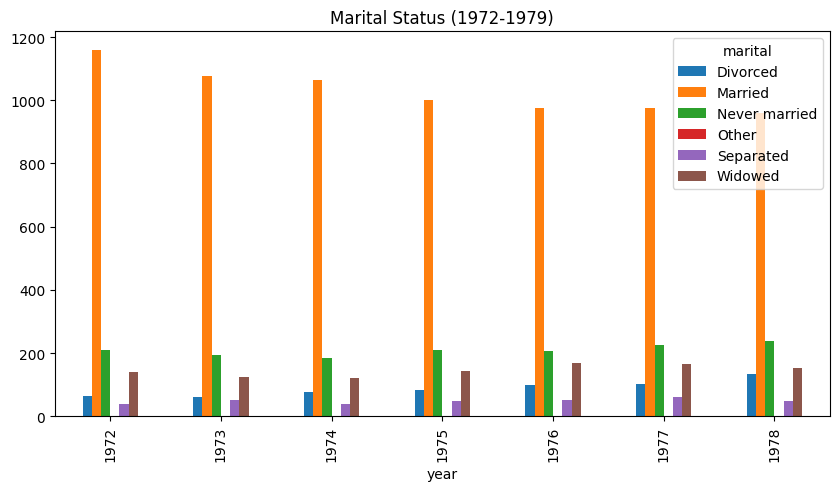

<Axes: title={'center': 'Marital Status (1980-1990)'}, xlabel='year'>

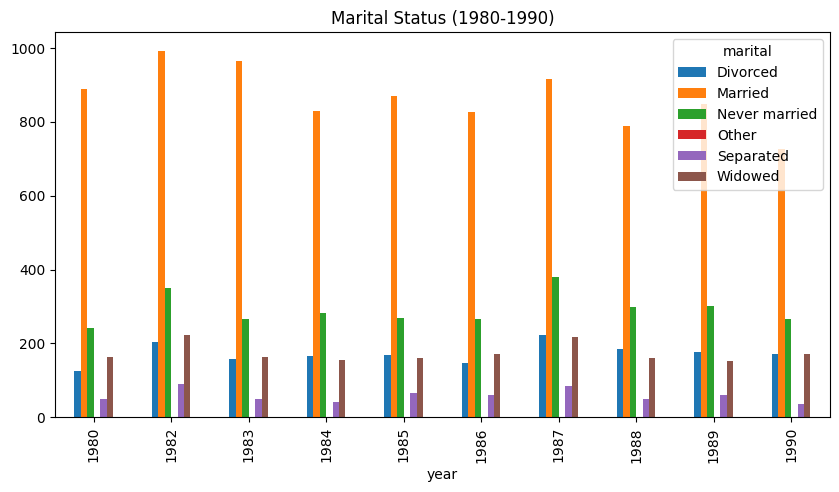

<Axes: title={'center': 'Marital Status (1991-2009)'}, xlabel='year'>

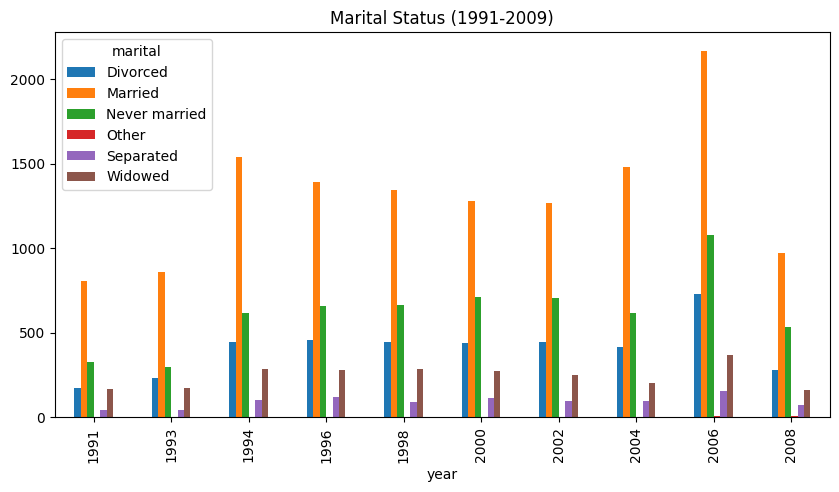

<Axes: title={'center': 'Marital Status (2010-2025)'}, xlabel='year'>

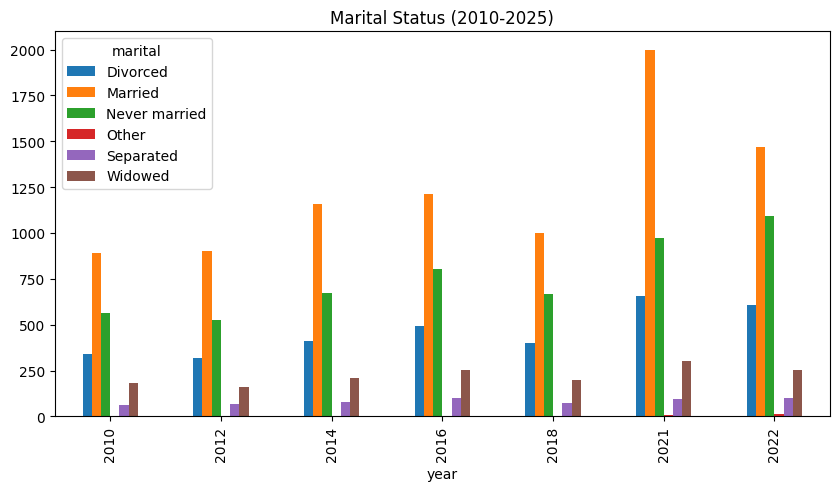

Text(0.5, 1.0, 'Marital Status Trends Over Time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Respondents')

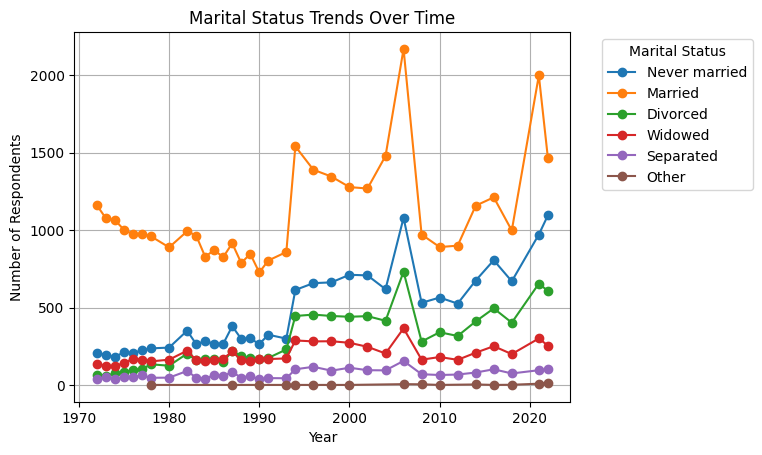

It appears that out of all, a lot of people are married versus anything else. The trend of marriage is strong before 1980, but takes a dip between 
1980 to 1990 before finding an all time high in the early 2000s. The trend then stays relatively constant between then and now. 
I'll also note that the trends of each other category follows the trend of the married populations. It's strange, but because of this, there was a massive 
peak in all categories in 2006, which I can't explain. Maybe there was panic right before the recession that cause marriage rates to increase, 
and therefore the couples that rushed to get married would divorce at higher rates?


In [ ]:
#MARITAL DATA:
print("MARITAL STATUS:")
#- cleaning: reading in excel, changing values unnecessary in widowed column to other 
marital_df = pd.read_excel("./data/marital/GSS.xlsx")

marital_df['marital'] = marital_df['marital'].replace({
    '.n:  No answer': 'Other',
    '.d:  Do not Know/Cannot Choose': 'Other',
    '.s:  Skipped on Web': 'Other'
})
print(marital_df.iloc[:, 2].unique())


#-numeric summaries and statements
# years_to_include = [2000, 2005, 2010, 2015, 2020]

# Filter the DataFrame
filtered_df_1 = marital_df[((marital_df["year"] >= 1972) & (marital_df["year"] <= 1979))]
filtered_df_2 = marital_df[((marital_df["year"] >= 1980) & (marital_df["year"] <= 1990))]
filtered_df_3 = marital_df[((marital_df["year"] >= 1991) & (marital_df["year"] <= 2009))]
filtered_df_4 = marital_df[((marital_df["year"] >= 2010) & (marital_df["year"] <= 2025))]

# Plot for filtered_df_1
filtered_df_1.groupby("year")[filtered_df_1.columns[2]].value_counts().unstack().plot(
    kind="bar", stacked=False, figsize=(10, 5), title="Marital Status (1972-1979)"
)
plt.show()

# Plot for filtered_df_2
filtered_df_2.groupby("year")[filtered_df_2.columns[2]].value_counts().unstack().plot(
    kind="bar", stacked=False, figsize=(10, 5), title="Marital Status (1980-1990)"
)
plt.show()

# Plot for filtered_df_3
filtered_df_3.groupby("year")[filtered_df_3.columns[2]].value_counts().unstack().plot(
    kind="bar", stacked=False, figsize=(10, 5), title="Marital Status (1991-2009)"
)
plt.show()

# Plot for filtered_df_4
filtered_df_4.groupby("year")[filtered_df_4.columns[2]].value_counts().unstack().plot(
    kind="bar", stacked=False, figsize=(10, 5), title="Marital Status (2010-2025)"
)
plt.show()


# Get Unique Marital Statuses
marital_statuses = marital_df["marital"].unique()

# Loop Through Each Marital Status and Plot It
for status in marital_statuses:
    # Count occurrences per year for this status
    counts = marital_df[marital_df["marital"] == status].groupby("year").size()
    
    # Plot the status over time
    plt.plot(counts.index, counts.values, marker="o", linestyle="-", label=status)

# Formatting
plt.title("Marital Status Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Respondents")
plt.legend(title="Marital Status", bbox_to_anchor=(1.05, 1), loc="upper left")  # Moves legend outside
plt.grid(True)
plt.show()

WIDOWED:
['Inapplicable' 'NO' 'Other' 'YES']


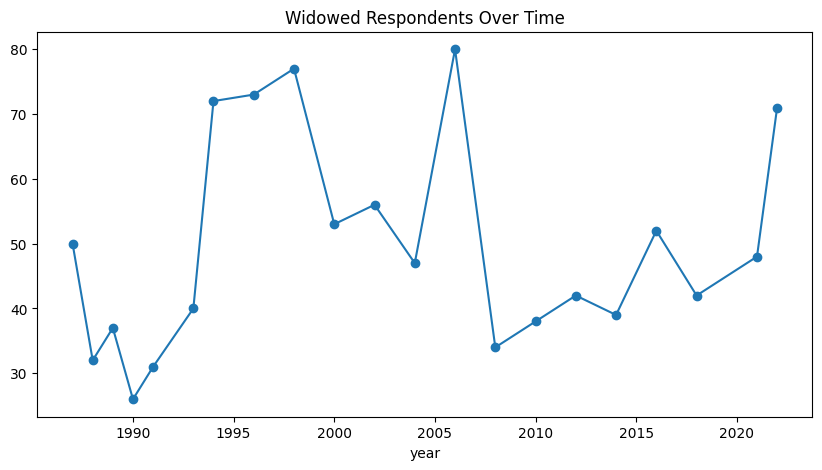

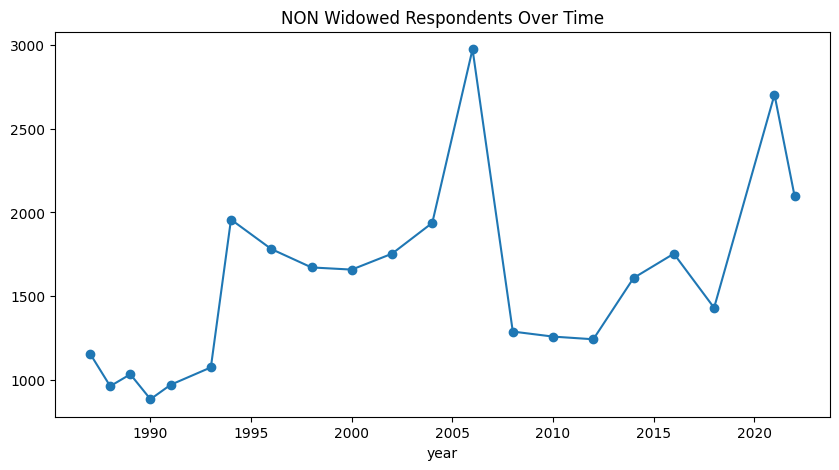

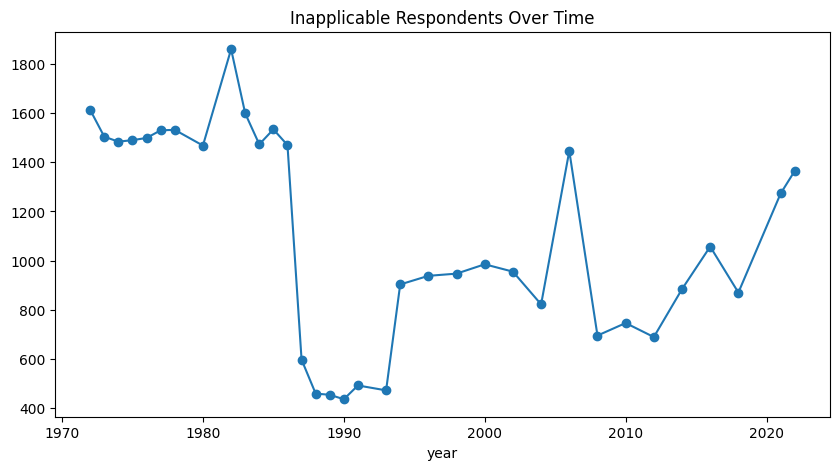

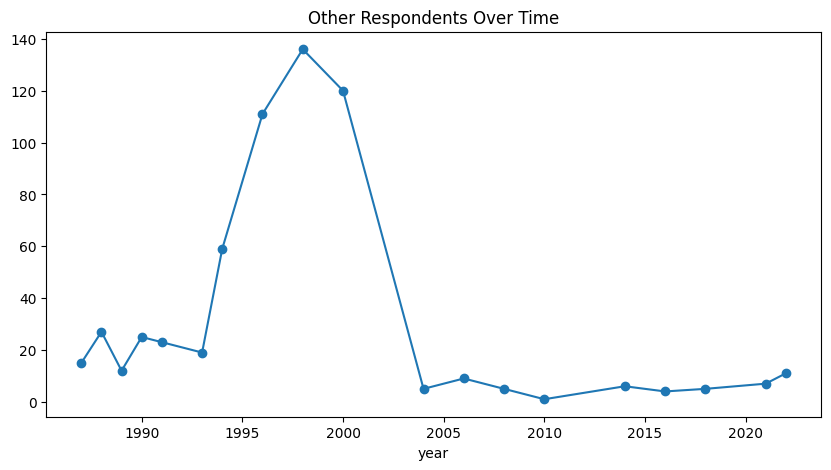

In [ ]:
#WIDOWED DATA:
print("WIDOWED:")
#- cleaning: reading in excel, changing values unneccessary in widowed column to other 
widowed_df = pd.read_excel("./data/widowed/GSS.xlsx")

widowed_df['widowed'] = widowed_df['widowed'].replace({
    '.i:  Inapplicable' : 'Inapplicable',
    '.n:  No answer': 'Other',
    '.d:  Do not Know/Cannot Choose': 'Other',
    '.s:  Skipped on Web': 'Other'
})

print(widowed_df.iloc[:, 2].unique())


#-numeric summaries and statements
widowed_yes_df = widowed_df[widowed_df[widowed_df.columns[2]] == "YES"]
# Group by year and count occurrences of "YES"
plot_widowed = widowed_yes_df.groupby("year")[widowed_yes_df.columns[2]].count().plot(
    kind='line', stacked=False, figsize=(10, 5), marker="o", title="Widowed Respondents Over Time"
)
plt.show()

widowed_yes_df = widowed_df[widowed_df[widowed_df.columns[2]] == "NO"]
# Group by year and count occurrences of "YES"
plot_widowed = widowed_yes_df.groupby("year")[widowed_yes_df.columns[2]].count().plot(
    kind='line', stacked=False, figsize=(10, 5), marker="o", title="NON Widowed Respondents Over Time"
)
plt.show()

widowed_yes_df = widowed_df[widowed_df[widowed_df.columns[2]] == "Inapplicable"]
# Group by year and count occurrences of "YES"
plot_widowed = widowed_yes_df.groupby("year")[widowed_yes_df.columns[2]].count().plot(
    kind='line', stacked=False, figsize=(10, 5), marker="o", title="Inapplicable Respondents Over Time"
)
plt.show()

widowed_yes_df = widowed_df[widowed_df[widowed_df.columns[2]] == "Other"]
# Group by year and count occurrences of "YES"
plot_widowed = widowed_yes_df.groupby("year")[widowed_yes_df.columns[2]].count().plot(
    kind='line', stacked=False, figsize=(10, 5), marker="o", title="Other Respondents Over Time"
)
plt.show()

SPDEG:
['Inapplicable' 'High school' 'Other' 'Graduate' 'Less than high school'
 "Bachelor's" 'Associate/Junior college']


<Figure size 1000x500 with 0 Axes>

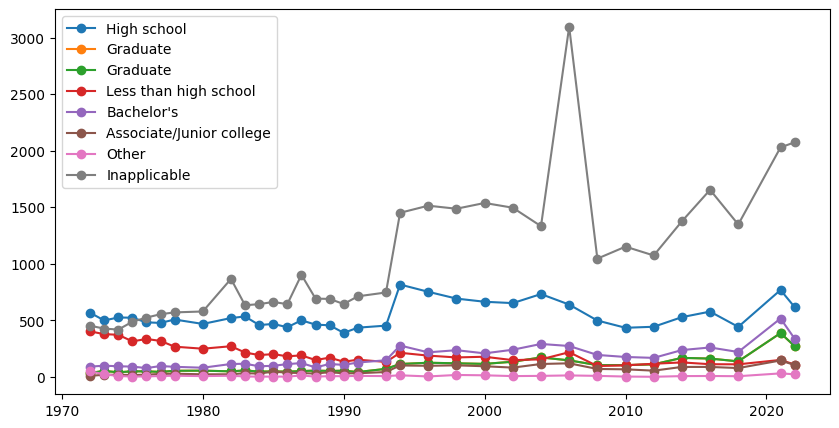

<Figure size 1000x500 with 0 Axes>

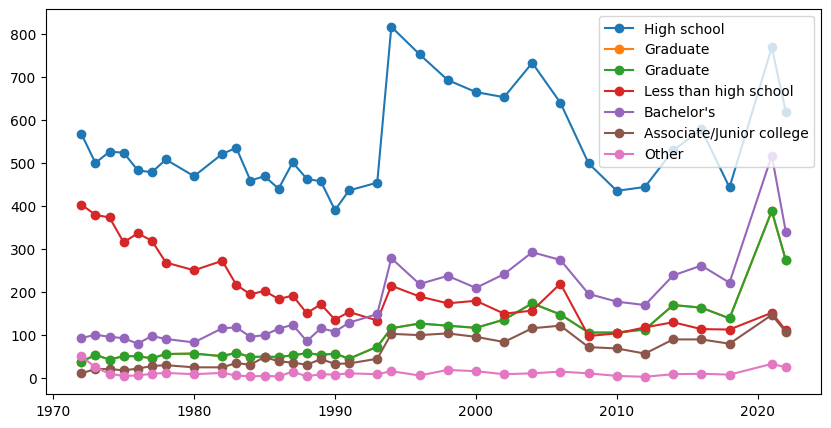

In [ ]:
#SPDEG DATA:
print("SPDEG:")
#- cleaning: reading in excel, changing values unnecessary in spdeg column to other 
spdeg_df = pd.read_excel("./data/spdeg/GSS.xlsx")

spdeg_df['spdeg'] = spdeg_df['spdeg'].replace({
    '.i:  Inapplicable' : 'Inapplicable',
    '.n:  No answer': 'Other',
    '.d:  Do not Know/Cannot Choose': 'Other',
    '.s:  Skipped on Web': 'Other'
})

print(spdeg_df.iloc[:, 2].unique())

spdeg_1972_df = spdeg_df[spdeg_df["year"] == 1972]
spdeg_2022_df = spdeg_df[spdeg_df["year"] == 2022]


#-numeric summaries and statements
plt.figure(figsize=(10, 5))

hs_counts = spdeg_df[spdeg_df["spdeg"] == "High school"].groupby("year").size()
plt.plot(hs_counts.index, hs_counts.values, marker="o", linestyle="-", label="High school")

grad_counts = spdeg_df[spdeg_df["spdeg"] == "Graduate"].groupby("year").size()
plt.plot(grad_counts.index, grad_counts.values, marker="o", linestyle="-", label="Graduate")

grad_counts = spdeg_df[spdeg_df["spdeg"] == "Graduate"].groupby("year").size()
plt.plot(grad_counts.index, grad_counts.values, marker="o", linestyle="-", label="Graduate")

less_hs_counts = spdeg_df[spdeg_df["spdeg"] == "Less than high school"].groupby("year").size()
plt.plot(less_hs_counts.index, less_hs_counts.values, marker="o", linestyle="-", label="Less than high school")

cachelor_counts = spdeg_df[spdeg_df["spdeg"] == "Bachelor's"].groupby("year").size()
plt.plot(cachelor_counts.index, cachelor_counts.values, marker="o", linestyle="-", label="Bachelor's")

associate_counts = spdeg_df[spdeg_df["spdeg"] == "Associate/Junior college"].groupby("year").size()
plt.plot(associate_counts.index, associate_counts.values, marker="o", linestyle="-", label="Associate/Junior college")

other_counts = spdeg_df[spdeg_df["spdeg"] == "Other"].groupby("year").size()
plt.plot(other_counts.index, other_counts.values, marker="o", linestyle="-", label="Other")

inapplicable_counts = spdeg_df[spdeg_df["spdeg"] == "Inapplicable"].groupby("year").size()
plt.plot(inapplicable_counts.index, inapplicable_counts.values, marker="o", linestyle="-", label="Inapplicable")

plt.legend()
plt.show()



plt.figure(figsize=(10, 5))

hs_counts = spdeg_df[spdeg_df["spdeg"] == "High school"].groupby("year").size()
plt.plot(hs_counts.index, hs_counts.values, marker="o", linestyle="-", label="High school")

grad_counts = spdeg_df[spdeg_df["spdeg"] == "Graduate"].groupby("year").size()
plt.plot(grad_counts.index, grad_counts.values, marker="o", linestyle="-", label="Graduate")

grad_counts = spdeg_df[spdeg_df["spdeg"] == "Graduate"].groupby("year").size()
plt.plot(grad_counts.index, grad_counts.values, marker="o", linestyle="-", label="Graduate")

less_hs_counts = spdeg_df[spdeg_df["spdeg"] == "Less than high school"].groupby("year").size()
plt.plot(less_hs_counts.index, less_hs_counts.values, marker="o", linestyle="-", label="Less than high school")

cachelor_counts = spdeg_df[spdeg_df["spdeg"] == "Bachelor's"].groupby("year").size()
plt.plot(cachelor_counts.index, cachelor_counts.values, marker="o", linestyle="-", label="Bachelor's")

associate_counts = spdeg_df[spdeg_df["spdeg"] == "Associate/Junior college"].groupby("year").size()
plt.plot(associate_counts.index, associate_counts.values, marker="o", linestyle="-", label="Associate/Junior college")

other_counts = spdeg_df[spdeg_df["spdeg"] == "Other"].groupby("year").size()
plt.plot(other_counts.index, other_counts.values, marker="o", linestyle="-", label="Other")

plt.legend()
plt.show()

/var/folders/_2/3z4yyh_x2pvfz5gh_k92c24h0000gn/T/ipykernel_86836/1950704078.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hompop_df['hompop'].fillna(avg_hompop, inplace=True)


[ 1.    2.    4.    3.    7.    5.    6.   11.    9.    8.   10.   14.
 15.   12.    2.61 13.   16.    0.  ]


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='hompop', ylabel='Count'>

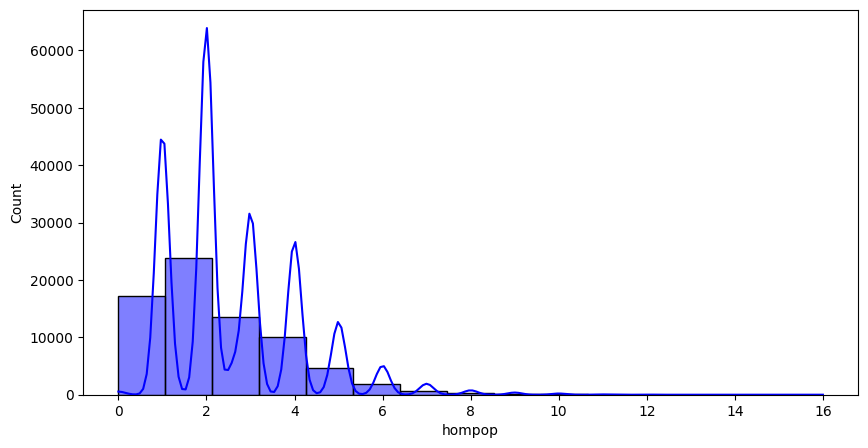

In [ ]:
#HOMPOP DATA:
import numpy as np
import pandas as pd
#- cleaning: reading in excel, changing values unnecessary in hompop column to Other 
hompop_df = pd.read_excel("./data/hompop/GSS.xlsx")

# print(hompop_df[hompop_df['hompop'] == '-100'].count())

# replace weird values with np.nan
hompop_df['hompop'] = hompop_df['hompop'].replace({
    '.n:  No answer': np.nan,
    '-100' : np.nan
})

# coerce into a numeric column
hompop_df['hompop'] = pd.to_numeric(hompop_df['hompop'], errors='coerce')

# take mean and fill it to the missing np.nan values
avg_hompop = round(hompop_df['hompop'].mean(), 2) 
hompop_df['hompop'].fillna(avg_hompop, inplace=True)

print(hompop_df.iloc[:, 2].unique())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(hompop_df["hompop"], bins=15, kde=True, color="blue")

In [176]:
#5
print("\n\n#5.")
import docx2txt # code from #2
import textwrap
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

text = docx2txt.process("number_5.docx")
wrapped_text = "\n\n".join(textwrap.fill(para, width=160) for para in text.split("\n") if para.strip())

print("FROM OTHER WORD DOCUMENT IN DIRECTORY:\n")

print(wrapped_text)



#5.
FROM OTHER WORD DOCUMENT IN DIRECTORY:

DIVORCED:

From the graph, I noticed that there has consistently been a far greater amount of non-divorcee population compared to a divorcee population.  I guess this was
consistent with what I thought, but I did expect there to be more divorced people as the years grew due to changing social climates,  but they stayed very
consistent. Surprisingly, there were a growing number of 'inapplicables', which tell me that more people have decided to stay single compared to married, or
thus divorced. This could be indicative of people understanding that marriage isn't necessary, and that people feel better off single than legally with someone.

MARITAL:

It  appears that out of all, a lot of people are married versus anything else. The trend of marriage is strong before 1980 but takes a dip between  1980 to 1990
before finding an all-time high in the early 2000s. The trend then stays relatively constant between then and now. I'll also note that the

#6.
I wanted to analyze how spousal degrees might correlate with divorce rates. Here's a graph to analyze this relationship:


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Education Level vs. Divorce Rates')

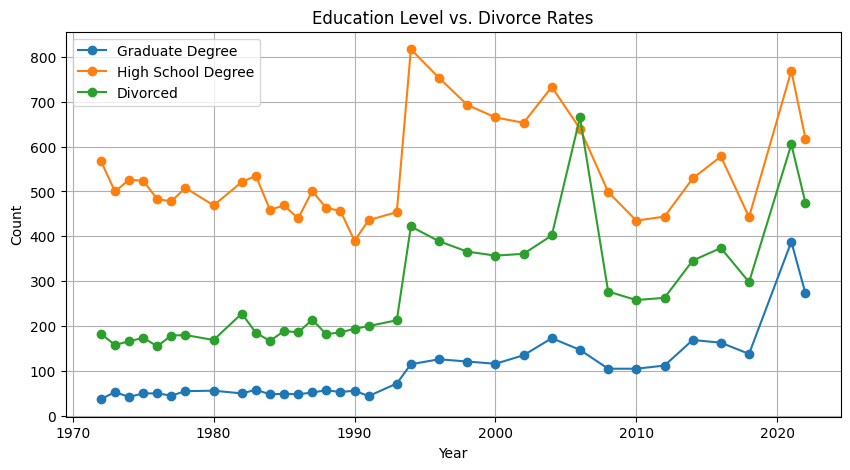

I find this interesting because it seems that the rises in divorce amounts correlate with trends in degrees, high school or graduate. 
I might have to say that this could just be a coincidence as there could be confounding variables, of which I don't know. It's just interesting that as 
more people report they've been divorced, there's an increase in people saying they have a graduate or high school degree.


In [184]:
#6. 
print("#6.")
print("I wanted to analyze how spousal degrees might correlate with divorce rates. Here's a graph to analyze this relationship:")

plt.figure(figsize=(10, 5))

# Plot "Graduate" degree trend
plt.plot(spdeg_df.groupby("year")["spdeg"].value_counts().unstack()["Graduate"], 
         label="Graduate Degree", marker="o", linestyle="-")

# Plot "High school" degree trend
plt.plot(spdeg_df.groupby("year")["spdeg"].value_counts().unstack()["High school"], 
         label="High School Degree", marker="o", linestyle="-")

# Plot Divorce trend
plt.plot(divorce_df.groupby("year")["divorce"].value_counts().unstack()["YES"], 
         label="Divorced", marker="o", linestyle="-")

# Formatting
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Education Level vs. Divorce Rates")
plt.legend()
plt.grid(True)
plt.show()


print("I find this interesting because it seems that the rises in divorce amounts correlate with trends in degrees, high school or graduate. \nI might have to say that this could just be a coincidence as there could be confounding variables, of which I don't know. It's just interesting that as \nmore people report they've been divorced, there's an increase in people saying they have a graduate or high school degree.")